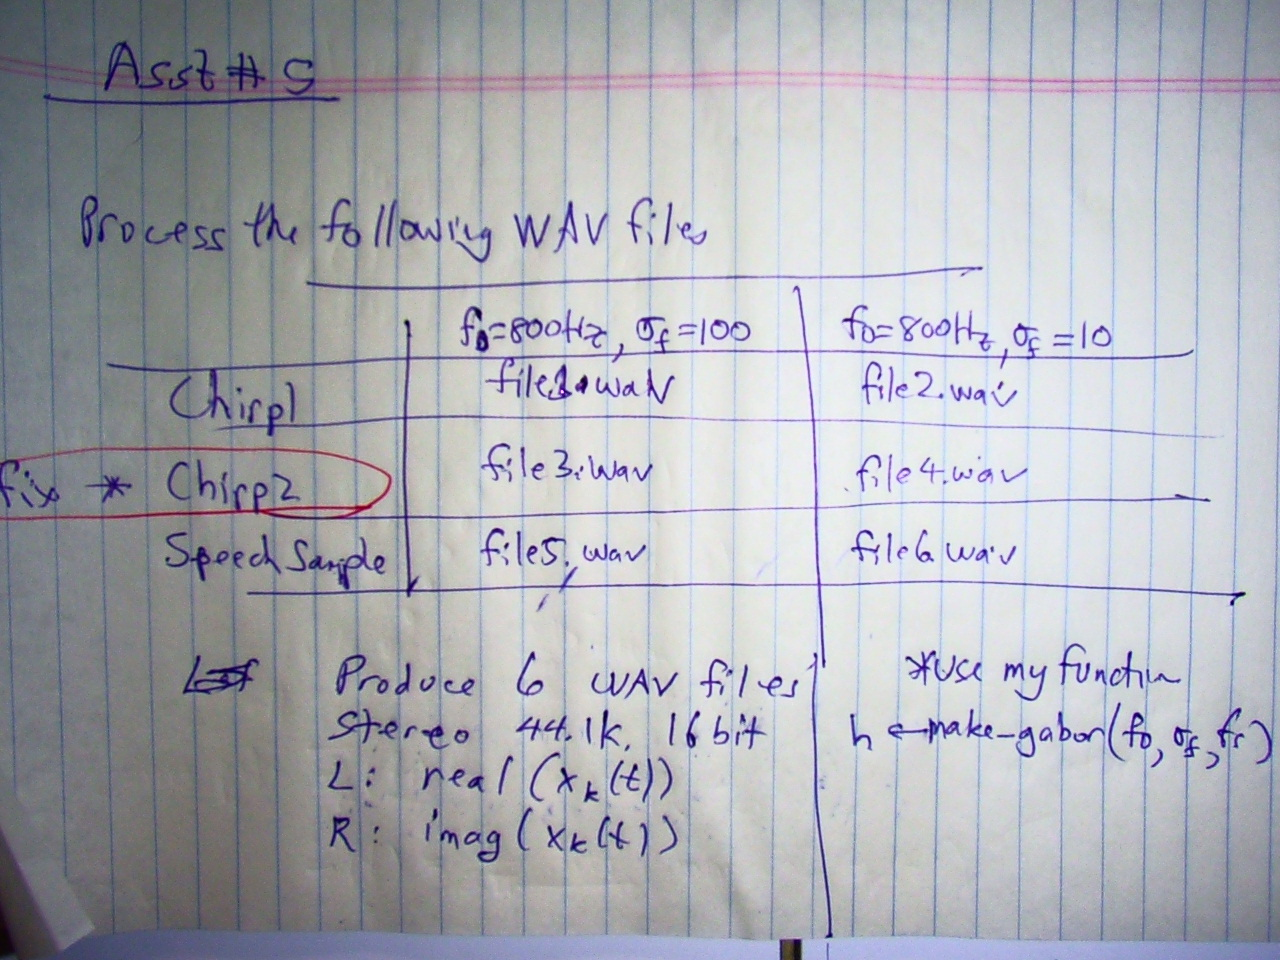

In [4]:
from IPython.display import Image 
Image(filename='IMAG0024.JPG', width="60%")

In [11]:
import numpy as np
from numpy import fft
import scipy.io.wavfile
import matplotlib.pyplot as plt
from scipy import signal

def norm(sig):
    return sig/np.max(np.abs(sig))

In [55]:
def make_gabor(f0, sigma_f, fs):
#      [h] = make_gabor(f0, sigma_f, fs)
#      Returns (complex valued) gabor filter
    sigma_t=1/(2*np.pi*sigma_f);
    dt=1/float(fs)

    n_sigma=3.0; # width of filter
    n_lim = int(n_sigma*sigma_t*fs);
    n_idx = range(-n_lim, n_lim)
    n_idx = np.array([n_idx])[0]
    N = len(n_idx);
    t_val = n_idx*dt;
    wt=np.exp(-0.5*(t_val/sigma_t)**2);
    wt=wt/np.sqrt(2*np.pi)/sigma_t; # FUDGE?  Factor of 2???

    wh=np.exp(1j*2*np.pi*f0*t_val);
    h=wt*wh*2/fs; # Filter integrates to one
    h=np.transpose(h);
    return h

In [58]:
# Read Files
fs1, chirp1 = scipy.io.wavfile.read('Chirp1.wav')
fs2, chirp2 = scipy.io.wavfile.read('Chirp2.wav')
fs3, speech = scipy.io.wavfile.read('SpeechSample.wav')
t1 = np.linspace(0, len(chirp1)*fs, len(chirp1))
t2 = np.linspace(0, len(chirp2)*fs2, len(chirp2))
t3 = np.linspace(0, len(speech)*fs3, len(speech))


/Users/adam/anaconda2/lib/python2.7/site-packages/scipy/io/wavfile.py:267: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


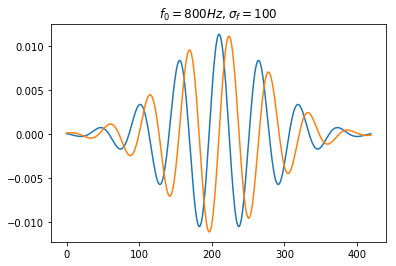

In [63]:
h1 = make_gabor(f0=800, sigma_f=100, fs=fs)
plt.plot(np.real(h1))
plt.plot(np.imag(h1))
plt.title("$f_0 = 800Hz, \sigma_f = 100$")
plt.show()

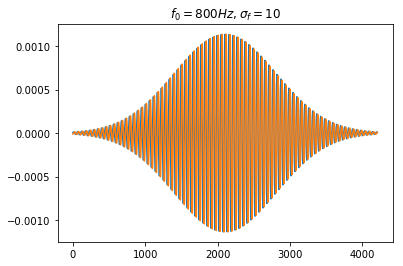

In [64]:
h2 = make_gabor(f0=800, sigma_f=10, fs=fs)
plt.plot(np.real(h2))
plt.plot(np.imag(h2))
plt.title("$f_0 = 800Hz, \sigma_f = 10$")
plt.show()

In [128]:
def splitChannels(sig):
    return np.transpose(np.array([norm(np.real(sig)), norm(np.imag(sig))]))

In [129]:
file1 = splitChannels(np.convolve(h1,chirp1))
file2 = splitChannels(np.convolve(h2,chirp1))

file3 = splitChannels(np.convolve(h1,chirp2))
file4 = splitChannels(np.convolve(h2,chirp2))

file5 = splitChannels(np.convolve(h1,speech))
file6 = splitChannels(np.convolve(h2,speech))

In [131]:
scipy.io.wavfile.write("file1.wav", fs1, file1)
scipy.io.wavfile.write("file2.wav", fs1, file2)

scipy.io.wavfile.write("file3.wav", fs2, file3)
scipy.io.wavfile.write("file4.wav", fs2, file4)

scipy.io.wavfile.write("file5.wav", fs3, file5)
scipy.io.wavfile.write("file6.wav", fs3, file6)